<a href="https://colab.research.google.com/github/paulkasahun/plant-leaf-disease-detection-project/blob/main/plantLeafdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow import keras


In [ ]:
from keras_preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input,decode_predictions

In [ ]:
train_data_gen =  ImageDataGenerator(
   zoom_range=0.5,
   shear_range=0.3,
   horizontal_flip= True,
   preprocessing_function=preprocess_input
)
val_data_gen = ImageDataGenerator(
  preprocessing_function=preprocess_input
)


In [ ]:
train = train_data_gen.flow_from_directory(
    directory="/content/drive/MyDrive/datasets/New Plant Diseases Dataset(Augmented)/train",
    target_size=(256,256),
    batch_size = 32
)
val= val_data_gen.flow_from_directory(
    directory="/content/drive/MyDrive/datasets/New Plant Diseases Dataset(Augmented)/valid",
    target_size=(256,256),
    batch_size = 32
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


##plot some of images

In [ ]:
t_img,label= train.next()

In [ ]:
t_img.shape



(32, 256, 256, 3)

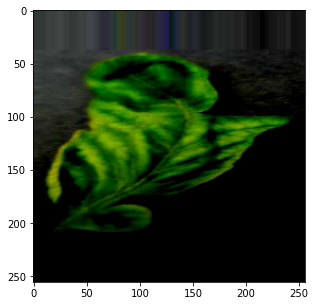

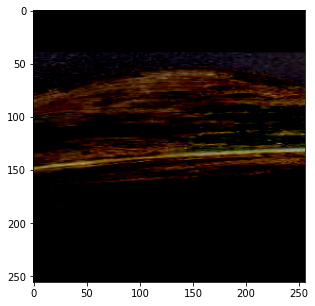

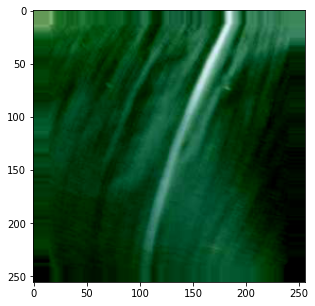

In [ ]:
def plotImage(img_arr,label):
  for im, l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

plotImage(t_img[:3],label[:3])



##build model

In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Model
# from keras.applications.vgg19 import VGG19
from keras.applications.mobilenet_v2 import MobileNetV2
import keras

In [ ]:
# baseModel=VGG19(
#       input_shape=(256,256,3),
#       include_top=False
#       )
baseModel= MobileNetV2(
      input_shape=(256,256,3),
      include_top=False
      )

for layer in baseModel.layers:
  layer.trainable= False
baseModel.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 32  128         ['Conv1[0][0]']                  
                

In [ ]:
X=Flatten()(baseModel.output)
X=Dense(units=5,activation='softmax')(X)

NameError: ignored

In [ ]:
model = Model(

    baseModel.input,
    X
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 32  128         ['Conv1[0][0]']                  
                                )                                                             

##Early stooping and call backs

In [ ]:
model.compile(
    optimizer ='adam',
    loss = keras.losses.categorical_crossentropy,
    metrics =['accuracy']
)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [ ]:
#early stop
Es= EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.01,
    patience=3,
    verbose=1
)
#model checkpoint

mc = ModelCheckpoint(
    filepath="best_model.h5",
    monitor='val_accuracy',
    min_delta=0.01,
    patience=3,
    verbose=1,
    save_best_only=True


)
##call backs

cb=[Es,mc]

In [ ]:
his=model.fit_generator(
    train,
    steps_per_epoch=16,
    epochs=50,
    verbose=1,
    callbacks= cb,
    validation_data = val,
    validation_steps= 16

)

<ipython-input-30-f9236a28d2bf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=model.fit_generator(


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 21.1413 - accuracy: 0.2051
Epoch 1: val_accuracy improved from -inf to 0.41406, saving model to best_model.h5
16/16 [==============================] - 301s 19s/step - loss: 21.1413 - accuracy: 0.2051 - val_loss: 8.7632 - val_accuracy: 0.4141
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 9.2937 - accuracy: 0.4824
Epoch 2: val_accuracy improved from 0.41406 to 0.60352, saving model to best_model.h5
16/16 [==============================] - 284s 18s/step - loss: 9.2937 - accuracy: 0.4824 - val_loss: 5.1368 - val_accuracy: 0.6035
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 6.7970 - accuracy: 0.6074
Epoch 3: val_accuracy improved from 0.60352 to 0.63867, saving model to best_model.h5
16/16 [==============================] - 280s 18s/step - loss: 6.7970 - accuracy: 0.6074 - val_loss: 5.4942 - val_accuracy: 0.6387
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 

In [ ]:
 ##acc=0.7656
 ##val-acc=0.84766 the model is not overfitting
##loss = 7.1655 c-loss= 4.7232


Get keys form the model

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

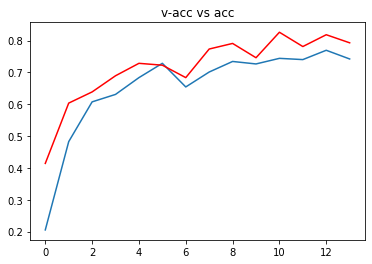

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')
plt.title("v-acc vs acc")
plt.show()

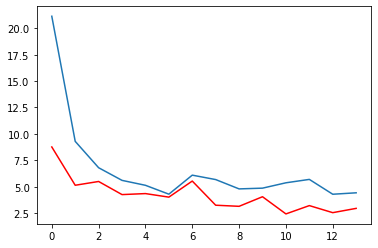

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c ="red")
plt.show()

load the best model

In [ ]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

##evaluate the model

In [ ]:
acc=model.evaluate_generator(val)[1]

<ipython-input-36-9e1e09aa5890>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc=model.evaluate_generator(val)[1]


In [ ]:
print(f"the accuracy of your model is {acc*100} %")

the accuracy of your model is 82.77941942214966 %


In [ ]:
refs=dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [ ]:
def prediction(path):
  img = load_img(path, target_size=(256,256))
  i = img_to_array(img)
  # preprocess before prediction
  im = preprocess_input(i)
  img= np.expand_dims(im,axis=0)
  # print(img.shape)
  pred=np.argmax(model.predict(img))#maximum of numbers or label
  print(f"the image belongs to {refs[pred]}")


In [ ]:
path1 = "/content/drive/MyDrive/datasets/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___healthy/028ed539-32f5-4540-a6af-466179837de9___R.S_HL 8212 copy.jpg"

In [ ]:
prediction(path1)

1/1 [==============================] - 0s 22ms/step
the image belongs to Corn_(maize)___healthy


take argmax of this prediction

In [ ]:
path2 ="/content/drive/MyDrive/New folder/IMG_20181221_110856.jpg"

In [ ]:
prediction(path2)

1/1 [==============================] - 0s 26ms/step
the image belongs to Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot


In [ ]:
# train.class_indices

In [ ]:
path3="/content/drive/MyDrive/datasets/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_mosaic_virus/000ec6ea-9063-4c33-8abe-d58ca8a88878___PSU_CG 2169_270deg.JPG"

In [ ]:
prediction(path3)

1/1 [==============================] - 0s 16ms/step
36


In [ ]:
path4="/content/drive/MyDrive/New folder/IMG_20190531_154756.jpg"
prediction(path4)

1/1 [==============================] - 0s 18ms/step
29


In [3]:
%save plantLeafdisease.ipynb


'' was not found in history, as a file, url, nor in the user namespace.
